<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Machine-Learning-models-sans-Packages-/blob/main/Deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source :https://www.geeksforgeeks.org/deep-neural-net-with-forward-and-back-propagation-from-scratch-python/?ref=lbp

model architecture

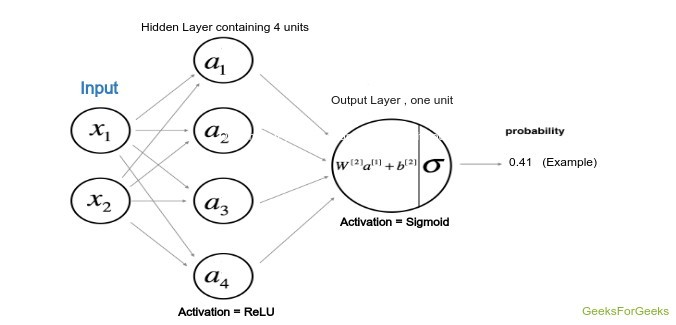

data loading and visualization

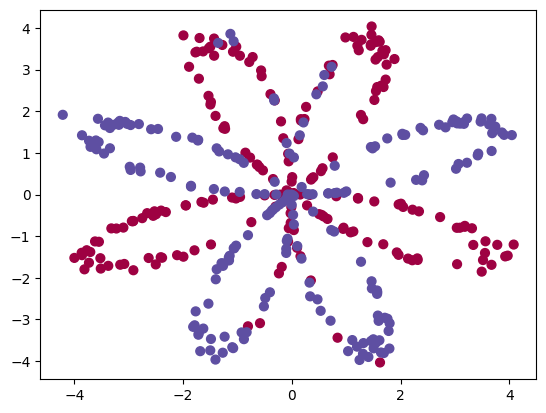

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y


X, Y = load_planar_dataset()

# Visualize the data:

plt.scatter(X[0, :], X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral)

weights and biases initialization

In [14]:
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


In [15]:
# X --> input dataset of shape
# Y --> labels of shape

W1 = np.random.randn(4, X.shape[0]) * 0.01
b1 = np.zeros(shape =(4, 1))

W2 = np.random.randn(Y.shape[0], 4) * 0.01
b2 = np.zeros(shape =(Y.shape[0], 1))


print("weights W1",W1.shape)
print("bias b1",b1.shape)
print("weights W2",W2.shape)
print("bias b2",b2.shape)

weights W1 (4, 2)
bias b1 (4, 1)
weights W2 (1, 4)
bias b2 (1, 1)


Forward propagation

In [16]:
def forward_propagation(X, W1, W2, b1, b2):

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # here the cache is the data of previous iteration
    # This will be used for backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache


Cost Function

In [17]:
# Here Y is actual output
def compute_cost(A2, Y):
    m = Y.shape[1]

    # implementing the above formula

    cost = -(1/m)*np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))

    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost

Back Propagation

In [18]:
def back_propagation(W1, b1, W2, b2, cache, learning_rate):

    # Retrieve also A1 and A2 from dictionary "cache"
    A1 = cache['A1']
    A2 = cache['A2']

    m = Y.shape[1]

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)

    # Updating the parameters according to algorithm
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, W2, b1, b2

Model Training

In [19]:
# Please note that the weights and bias are global
# Here iterations is epochs

iterations = 10000
learning_rate = 0.01

for i in range(0, iterations):
    # Forward propagation. Inputs: "X, parameters". return: "A2, cache".
    A2, cache = forward_propagation(X, W1, W2, b1, b2)

    # Cost function. Inputs: "A2, Y". Outputs: "cost".
    cost = compute_cost(A2, Y)

    # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
    W1, W2, b1, b2 = back_propagation(W1, b1, W2, b2, cache, learning_rate)

    # Print the cost every 1000 iterations
    if(i%(iterations/10) == 0):
        print("cost after ", i, "iteration is : ", cost)

cost after  0 iteration is :  0.6931125167719424
cost after  1000 iteration is :  0.690769022988963
cost after  2000 iteration is :  0.6796765214894879
cost after  3000 iteration is :  0.6664456671632039
cost after  4000 iteration is :  0.642080989446702
cost after  5000 iteration is :  0.6244000348842776
cost after  6000 iteration is :  0.6139285677885676
cost after  7000 iteration is :  0.5924678485570568
cost after  8000 iteration is :  0.5225076248975544
cost after  9000 iteration is :  0.4588374978872447


<ipython-input-21-dd9921552452>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


Accuracy: 85%


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

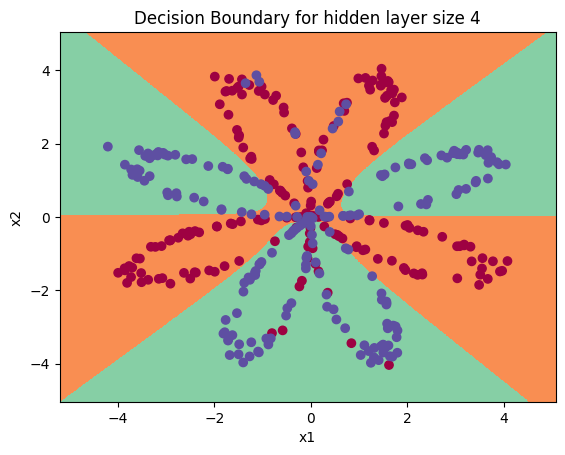

In [21]:

# Plotting the decision boundary
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


# Print accuracy
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters['W1'], parameters['W2'], parameters['b1'], parameters['b2'])
    predictions = (A2 > 0.5)

    return predictions

parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}

predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:])
plt.title("Decision Boundary for hidden layer size " + str(4))
